# LDA Analysis, Case Study 2: Temperature

We will be exploring an LDA analysis of the "Big/Small Metal Blocks" question, which asks students to compare the explain their reasoning on why two blocks of different masses, when plunged into water for five seconds, would change temperature by a different amount. In particular, the question is: 

> *Imagine you have two room-temperature blocks made of the same metal, but one has more mass than the other. You drop the blocks into equal volumes of 5-degrees-C water, count to five, and then dump them out onto a table. You measure the temperature of both blocks, and the less massive one is colder than the more massive one. That’s because the mass of an object matters for how much its temperature changes.*
> 
> *What we want to know is why that makes sense or doesn’t make sense to you: Why is it that a less massive block changes its temperature more than a more massive block made of the same material and at the same starting temperature?*

## I. Imports

In [1]:
# Print out all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Wider Cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# Ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import pickle as pkl
import copy

import sys  
sys.path.insert(0, '..')
from scripts.lda_model import *

## II. Data Import and Restructuring

In [2]:
df = pd.read_csv('../data/heat_and_temperature.csv', names = ['num', 'ID', 'resp', 'drop'])
df.drop(columns = ['num', 'ID', 'drop'], inplace = True)
df.head(5)

,resp
0,A less massive block changes its temperature m...
1,The more massive block has more molecules movi...
2,There are fewer molecules that need to have th...
3,This makes sense to me because the more mass o...
4,Thermal energy is stored in the vibrations of ...


## III. LDA Modeling

The following code will take the data processed above and convert it into a usable format for the LDA model. Before we start modeling, though, we need to set some parameters for our particular data. 

In [3]:
bigrams =               text_to_bigrams(df)
corpus =                bigrams_to_corpus(bigrams)

Let's take a look at some plots of the words used in the collection of student responses. 

Total words: 3540, unique words: 447


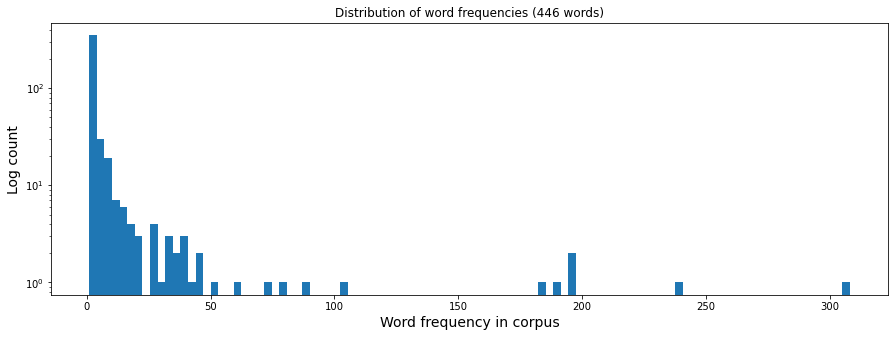

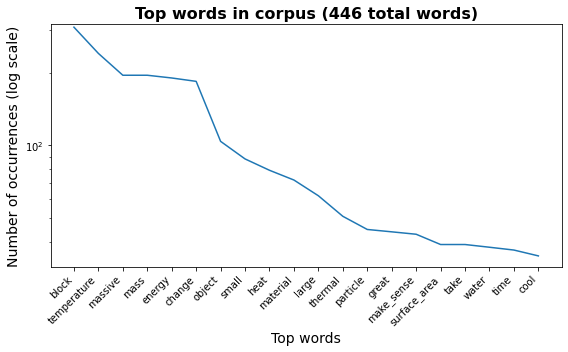

In [4]:
plot_words(corpus)

Let's now figure out the best thresholds for removing the most and least common words. A `no_above` threshold of 70% would remove words used in at least 70% of documents, and a `no_below` threshold of 3 would remove words used in only two or fewer documents. 

In [5]:
display_words_removed_at_thresholds(bigrams)


NO ABOVE THRESHOLDS


Dictionary with no_above=1 contains 447 unique words

Dictionary filtered with no_above=1.00 contains 447 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.90 contains 447 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.80 contains 447 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.70 contains 447 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.60 contains 445 unique words. 2 words removed:
 ['block', 'temperature'] 

Dictionary filtered with no_above=0.50 contains 444 unique words. 1 words removed:
 ['change'] 

Dictionary filtered with no_above=0.40 contains 441 unique words. 3 words removed:
 ['energy', 'mass', 'massive'] 

Dictionary filtered with no_above=0.30 contains 441 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.20 contains 436 unique words. 5 words removed:
 ['heat', 'large', 'material', 'object', 'small'] 

Dictionary filtered

You can now set the desired threshold values based on this particular data set. 

In [6]:
no_above = 0.4
no_below = 2

In [7]:
bow, id2word= create_bow(corpus, bigrams, no_above, no_below, 
                         display_removed_words = False)

We can now proceed with the actual modeling process. Here, you can set a number of topics desired for the model, as well as the number of responses to display for each topic. By default, the number of responses displayed is three, but that can be overridden by setting a value. 

In [8]:
num_topics = 5
num_responses_displayed = 5

In [9]:
model = LDA_model(bow, id2word, bigrams, 
                  num_topics = num_topics)
model.show_topics(num_words = 10, 
                  num_topics = num_topics)

Coherence of model with 5 topics: 0.31122471225864334




[(0,
  '0.077*"material" + 0.064*"heat" + 0.049*"faster" + 0.035*"need" + 0.032*"absorb" + 0.031*"mean" + 0.030*"low" + 0.029*"transfer" + 0.026*"make_sense" + 0.023*"rate"'),
 (1,
  '0.124*"object" + 0.050*"small" + 0.037*"heat" + 0.037*"surface_area" + 0.037*"material" + 0.033*"large" + 0.033*"volume" + 0.027*"atom" + 0.027*"great" + 0.026*"make_sense"'),
 (2,
  '0.101*"small" + 0.055*"heat" + 0.046*"large" + 0.032*"water" + 0.030*"material" + 0.030*"lose" + 0.029*"make_sense" + 0.028*"surface_area" + 0.026*"specific_heat" + 0.026*"cool"'),
 (3,
  '0.101*"particle" + 0.039*"heat" + 0.035*"molecule" + 0.032*"average" + 0.027*"time" + 0.026*"object" + 0.026*"require" + 0.025*"kinetic" + 0.022*"mean" + 0.021*"atom"'),
 (4,
  '0.097*"thermal" + 0.050*"take" + 0.044*"great" + 0.042*"large" + 0.039*"material" + 0.039*"heat_capacity" + 0.038*"specific_heat" + 0.033*"require" + 0.033*"capacity" + 0.027*"water"')]

In [10]:
display_n_responses(df, num_responses_displayed, model, corpus, bow)

Topic 0: 0.077*"material" + 0.064*"heat" + 0.049*"faster" + 0.035*"need" + 0.032*"absorb" + 0.031*"mean" + 0.030*"low" + 0.029*"transfer" + 0.026*"make_sense" + 0.023*"rate"


,resp,0,1,2,3,4
207,"A less massive block changes its temperature more than a more massive block made of the same material at the same starting temperature because there's more room in the more massive block to spread out its temperature. In other words, there are more bonds within the more massive block that can absorb heat. Because there are more bonds to absorb this heat, the average thermal energy in each bond/interaction (the temperature), is lower than the block with less bonds.",0.979365,0.0,0.0,0.0,0.0
144,"YES, the heat transfer energy for same material is same during same time. So with greater mass, the delta t would be less due to the heat transfer law.",0.977354,0.0,0.0,0.0,0.0
145,There is more material or thermal mass that needs to be cooled for the average temperature of the material to lower. So less mass means the temp changes more.,0.974910,0.0,0.0,0.0,0.0
31,"More mass means that there is more material to ""convert"" to lower temperature, so it will take more time for the temperature of the higher mass block to lower compared to the lower mass block.",0.974910,0.0,0.0,0.0,0.0
51,"There are more particles in the one with greater mass. Since there are more particles, more work has to be done in order to make the more massive one reach the same temperature as the less massive one. Since the same amount of work is being applied to both, the more massive one will be less cold.",0.974910,0.0,0.0,0.0,0.0





Topic 1: 0.124*"object" + 0.050*"small" + 0.037*"heat" + 0.037*"surface_area" + 0.037*"material" + 0.033*"large" + 0.033*"volume" + 0.027*"atom" + 0.027*"great" + 0.026*"make_sense"


,resp,0,1,2,3,4
232,"Mass is the measurement of how much matter an object is composed of, intrinsically an object with a lower mass than another object made of the same material will have fewer atoms. Temperature is simply the perception of how fast an objects atoms are moving, or vibrating, with a higher temperature object's atoms vibrating or moving faster than a cooler object's. To change the temperature of these objects energy must be applied to slow the vibrations of these atoms. The more atoms the more energy is needed to change an objects temperature, in a system that can only exert or draw a set amount of energy over a given period of time, the more time it will take to cool or heat a more massive object than a less massive object of the same material. That is why the above example makes sense.",0.0,0.995452,0.0,0.0,0.0
163,This occurs because we need to understand the ratio of surface area of the two objects to their mass. The object with less mass has a ratio of surface area that is more relative to its mass then the object with more mass. This causes more thermal energy to transfer through the surface relative to its total mass compared to the larger mass object. This causes the less massive block to change its temperature much faster.,0.0,0.991776,0.0,0.0,0.0
201,"I believe the statement ""the less massive block changes its temperature more than a more massive block made of the same material (and with the same starting temperature)"" makes sense because objects with more mass tend to attract the ambient temperature much better than the same object with less mass. Additionally, the greater the mass, the greater amount of heat or energy is transferred. Therefore, it would make sense that the more mass metal is cooler taken out of the water compared to the metal with less mass.",0.0,0.989974,0.0,0.0,0.0
231,Heavier metals take longer to change temperature. I have noticed this myself in my life. A larger piece of steel will take longer to cool down compared to a smaller piece. I think this is because heavier metals have a greater amount to change in temperature and require more thermal energy to complete.,0.0,0.988741,0.0,0.0,0.0
218,"Both objects are made of the same material, but different in size. This means that the reason that smaller mass block changed temperature more easily is because there is less material to heat up, versus the bigger block which needs longer time to heat up.",0.0,0.988004,0.0,0.0,0.0





Topic 2: 0.101*"small" + 0.055*"heat" + 0.046*"large" + 0.032*"water" + 0.030*"material" + 0.030*"lose" + 0.029*"make_sense" + 0.028*"surface_area" + 0.026*"specific_heat" + 0.026*"cool"


,resp,0,1,2,3,4
205,"This makes sense only because I know the equation Q=mcdeltaT where if a metal has the same specific heat cap. but a different mass than that would affect the change in temperature. Based off the equation alone, if everything were the same except one mass is smaller than the other you could imagine that the change in temperature would also be smaller for the smaller mass, it would take longer to heat up something with a bigger mass than something with a smaller mass. If I put a chicken breast in the oven its going to have to cook longer than if I cook a chicken breast that I smashed to make thinner. In my mind it's the same idea but with mass being the variable instead of size.",0.0,0.0,0.991161,0.0,0.0
73,"The amount of energy that a material can store as temperature, otherwise known as specific heat, is a measure of the thermal energy stored per unit mass. Therefore, a more massive block is able to store more energy within it, and therefore less subject to losing this heat when placed into water.",0.0,0.0,0.984965,0.0,0.0
96,I know heat is Q= m*C*Delta T. The two blocks have the same specific heat capacity. They lost the same amount of heat so it makes sense that the smaller block has a larger change in temperature since Delta T = Q/m/c. Its m is smaller so its delta T is larger.,0.0,0.0,0.984965,0.0,0.0
72,It makes sense to me because the smaller cube has a much larger area to volume ratio than the larger cube which means it can lose heat more readily.,0.0,0.0,0.982513,0.0,0.0
80,The smaller block has both a lower volume to surface area ratio and less total thermal energy to lose. The energy doesn't have as far to travel and more surface area to escape from for the smaller block.,0.0,0.0,0.980961,0.0,0.0





Topic 3: 0.101*"particle" + 0.039*"heat" + 0.035*"molecule" + 0.032*"average" + 0.027*"time" + 0.026*"object" + 0.026*"require" + 0.025*"kinetic" + 0.022*"mean" + 0.021*"atom"


,resp,0,1,2,3,4
242,"It make sense because the one with the more massive block has more molecules. it takes more time to heat more molecules and it takes more time as well when it gets cold comparing to the one with the less massive block. Imagine you have a room you have 20 people to enter the room, and you have another room and you have 10 people to enter that second room. it will take more time to get the 20 people in the first room than to get the 10 people in the second room. The room is the blocks, the people are the molecules, and to get then inside the room is the temperature.",0.0,0.0,0.0,0.991859,0.0
210,"It's easier to understand how mass affects heat transfer if you think about temperature, a measure of internal energy, as a physical thing. If you think of other physical things, like peanut butter, it makes sense that peanut butter is spread thinner over a larger piece of bread. In the same way, the internal energy of the system is shared evenly with the whole mass of the submerged object. Therefore, the larger the object, the less temperature to go around.",0.0,0.0,0.0,0.990809,0.0
55,"This idea does make sense to me, although I'm not sure I have the proper reasoning for it. Based off the definition of temperature, in terms of measuring the KE of the particles, a more massive block has more particles that need to cool down in order for the average KE of the particles to be lower. This is why a block with less mass can cool down faster.",0.0,0.0,0.0,0.988901,0.0
21,"A less massive block has a faster rate of temperature change because there is an equal amount of total kinetic energy for the particles in both blocks, but in the less massive block, there are fewer particles, so each particle has more energy compared to a particle in the more massive block. More energy means that in collisions with the water molecules, more energy is transferred at a faster rate.",0.0,0.0,0.0,0.988293,0.0
120,"Each particle/atom within the block requires the same amount of energy to change its temperature, and if the blocks are both mde of the same material, then it would make sense that if there rae more particles/atoms, it would require more energy to raise the energy (aka temperature) of the whole block by some amount as compared to a different block with fewer particles or atoms.",0.0,0.0,0.0,0.985992,0.0





Topic 4: 0.097*"thermal" + 0.050*"take" + 0.044*"great" + 0.042*"large" + 0.039*"material" + 0.039*"heat_capacity" + 0.038*"specific_heat" + 0.033*"require" + 0.033*"capacity" + 0.027*"water"


,resp,0,1,2,3,4
111,"If the two blocks are of the same material, they must be of the same density. If one is more massive this requires that it be larger in volume. Since the block is placed in a colder environment, its energy will be ""taken"" slowly. The larger block loses less energy in the same time because of its larger volume.",0.0,0.0,0.0,0.0,0.986095
98,"The total thermal energy of the more massive block is larger since it contains more material that has a certain temperature. Since water can only transfer so much entropy in a certain amount of time, the larger changes its temperature less in the same amount of time.",0.0,0.0,0.0,0.0,0.983999
89,"The more massive block has more tightly packed molecules and a greater density energy state. This means that the entropy of the more massive molecule is greater, and so the exchange of energy between the block and water for the more massive block will be slower than the less massive block.",0.0,0.0,0.0,0.0,0.981158
11,"The specific heat capacity of both blocks is the same, so the more massive one has more thermal energy. Since the surface area is not proportional to the increased mass, the rate of energy loss in the cold water is not enough to compensate for the larger amount of energy.",0.0,0.0,0.0,0.0,0.981157
165,"The specific heat of a material says that it takes a certain amount of energy to change the temperature of 1kg of a material by 1K. Since the larger block has a greater mass, the amount of energy required to change the blocks temperature by 1K is greater than that of the smaller block.",0.0,0.0,0.0,0.0,0.979322


Potential Ideas from LDA: 

0. More matter/mass ---> more energy, more resistant to change (thermal inertia?)
1. Something about the kinetic energy of the particles
2. Higher heat capacity / specific heat means longer time to cool down
3. Energy is "spread out" across more material in the larger block
4. Temperature is "stored" in mass or volume